### Data Vizualization & pre-processing for further analysis

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
dfw = pd.read_csv('winequalityN.csv')

In [4]:
dfw.shape

(6497, 13)

In [5]:
dfw.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
dfw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


If we look at the descibe data, we can notice that:

1. columns - 'fixed acidity' , 'free sulfur dioxide' etc, have a large difference between min and max eventhough their majority of the values lie in a similar range - outlier cleaning might be needed. 
2. Mean>median consistently

In [7]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


Our target variable is : quality 
Let us see, what kind of a feature is it .

In [8]:
dfw['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64



Data cleaning: all NaN, inf, -inf should be converted to float


In [6]:
dfw.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Hence, the values can be easily dropped because not a lot of nan values are there

In [10]:
def remove_garbage(df):
    df.dropna(inplace=True)
    df = df.loc[:, [i for i in df.columns]]
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [11]:
white_df = dfw.loc[0:4897,:]
red_df = dfw.loc[4898:-1,:]

In [12]:
white_df = white_df.drop(['type'], axis=1)
red_df = red_df.drop(['type'],axis=1)
white_df = remove_garbage(pd.DataFrame(data = white_df, columns = list(white_df.columns.values)))
white_df_x = white_df.iloc[:,[i for i in range(len(white_df.columns) - 1)]]
red_df = remove_garbage(pd.DataFrame(data = red_df, columns = list(red_df.columns.values))) 
red_df_x = red_df.iloc[:,[i for i in range(len(red_df.columns) - 1)]]


Text(0, 0.5, 'Quantity')

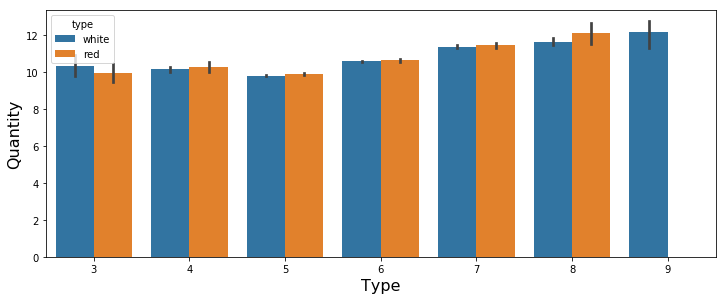

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.barplot(x=dfw['quality'], y=dfw['alcohol'],hue=dfw['type'])
plt.xlabel('Type',fontsize=16)
plt.ylabel('Quantity',fontsize=16)

We can observe that alcohol quantity is slightly more /equal to in white wine. Also,very high quality wines are only white wines

In [31]:
#some more interpretation from data:
dfw.dropna(axis=0,inplace=True) 
plt.figure(figsize=(12, 12))
sns.heatmap(white_df.corr(),annot=True,vmin=-1)

#red_df as well

NameError: name 'white_df' is not defined

<Figure size 864x864 with 0 Axes>

In [15]:
dfw.isin([np.nan,np.inf]).sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Hence, we have successfully removed the nan values

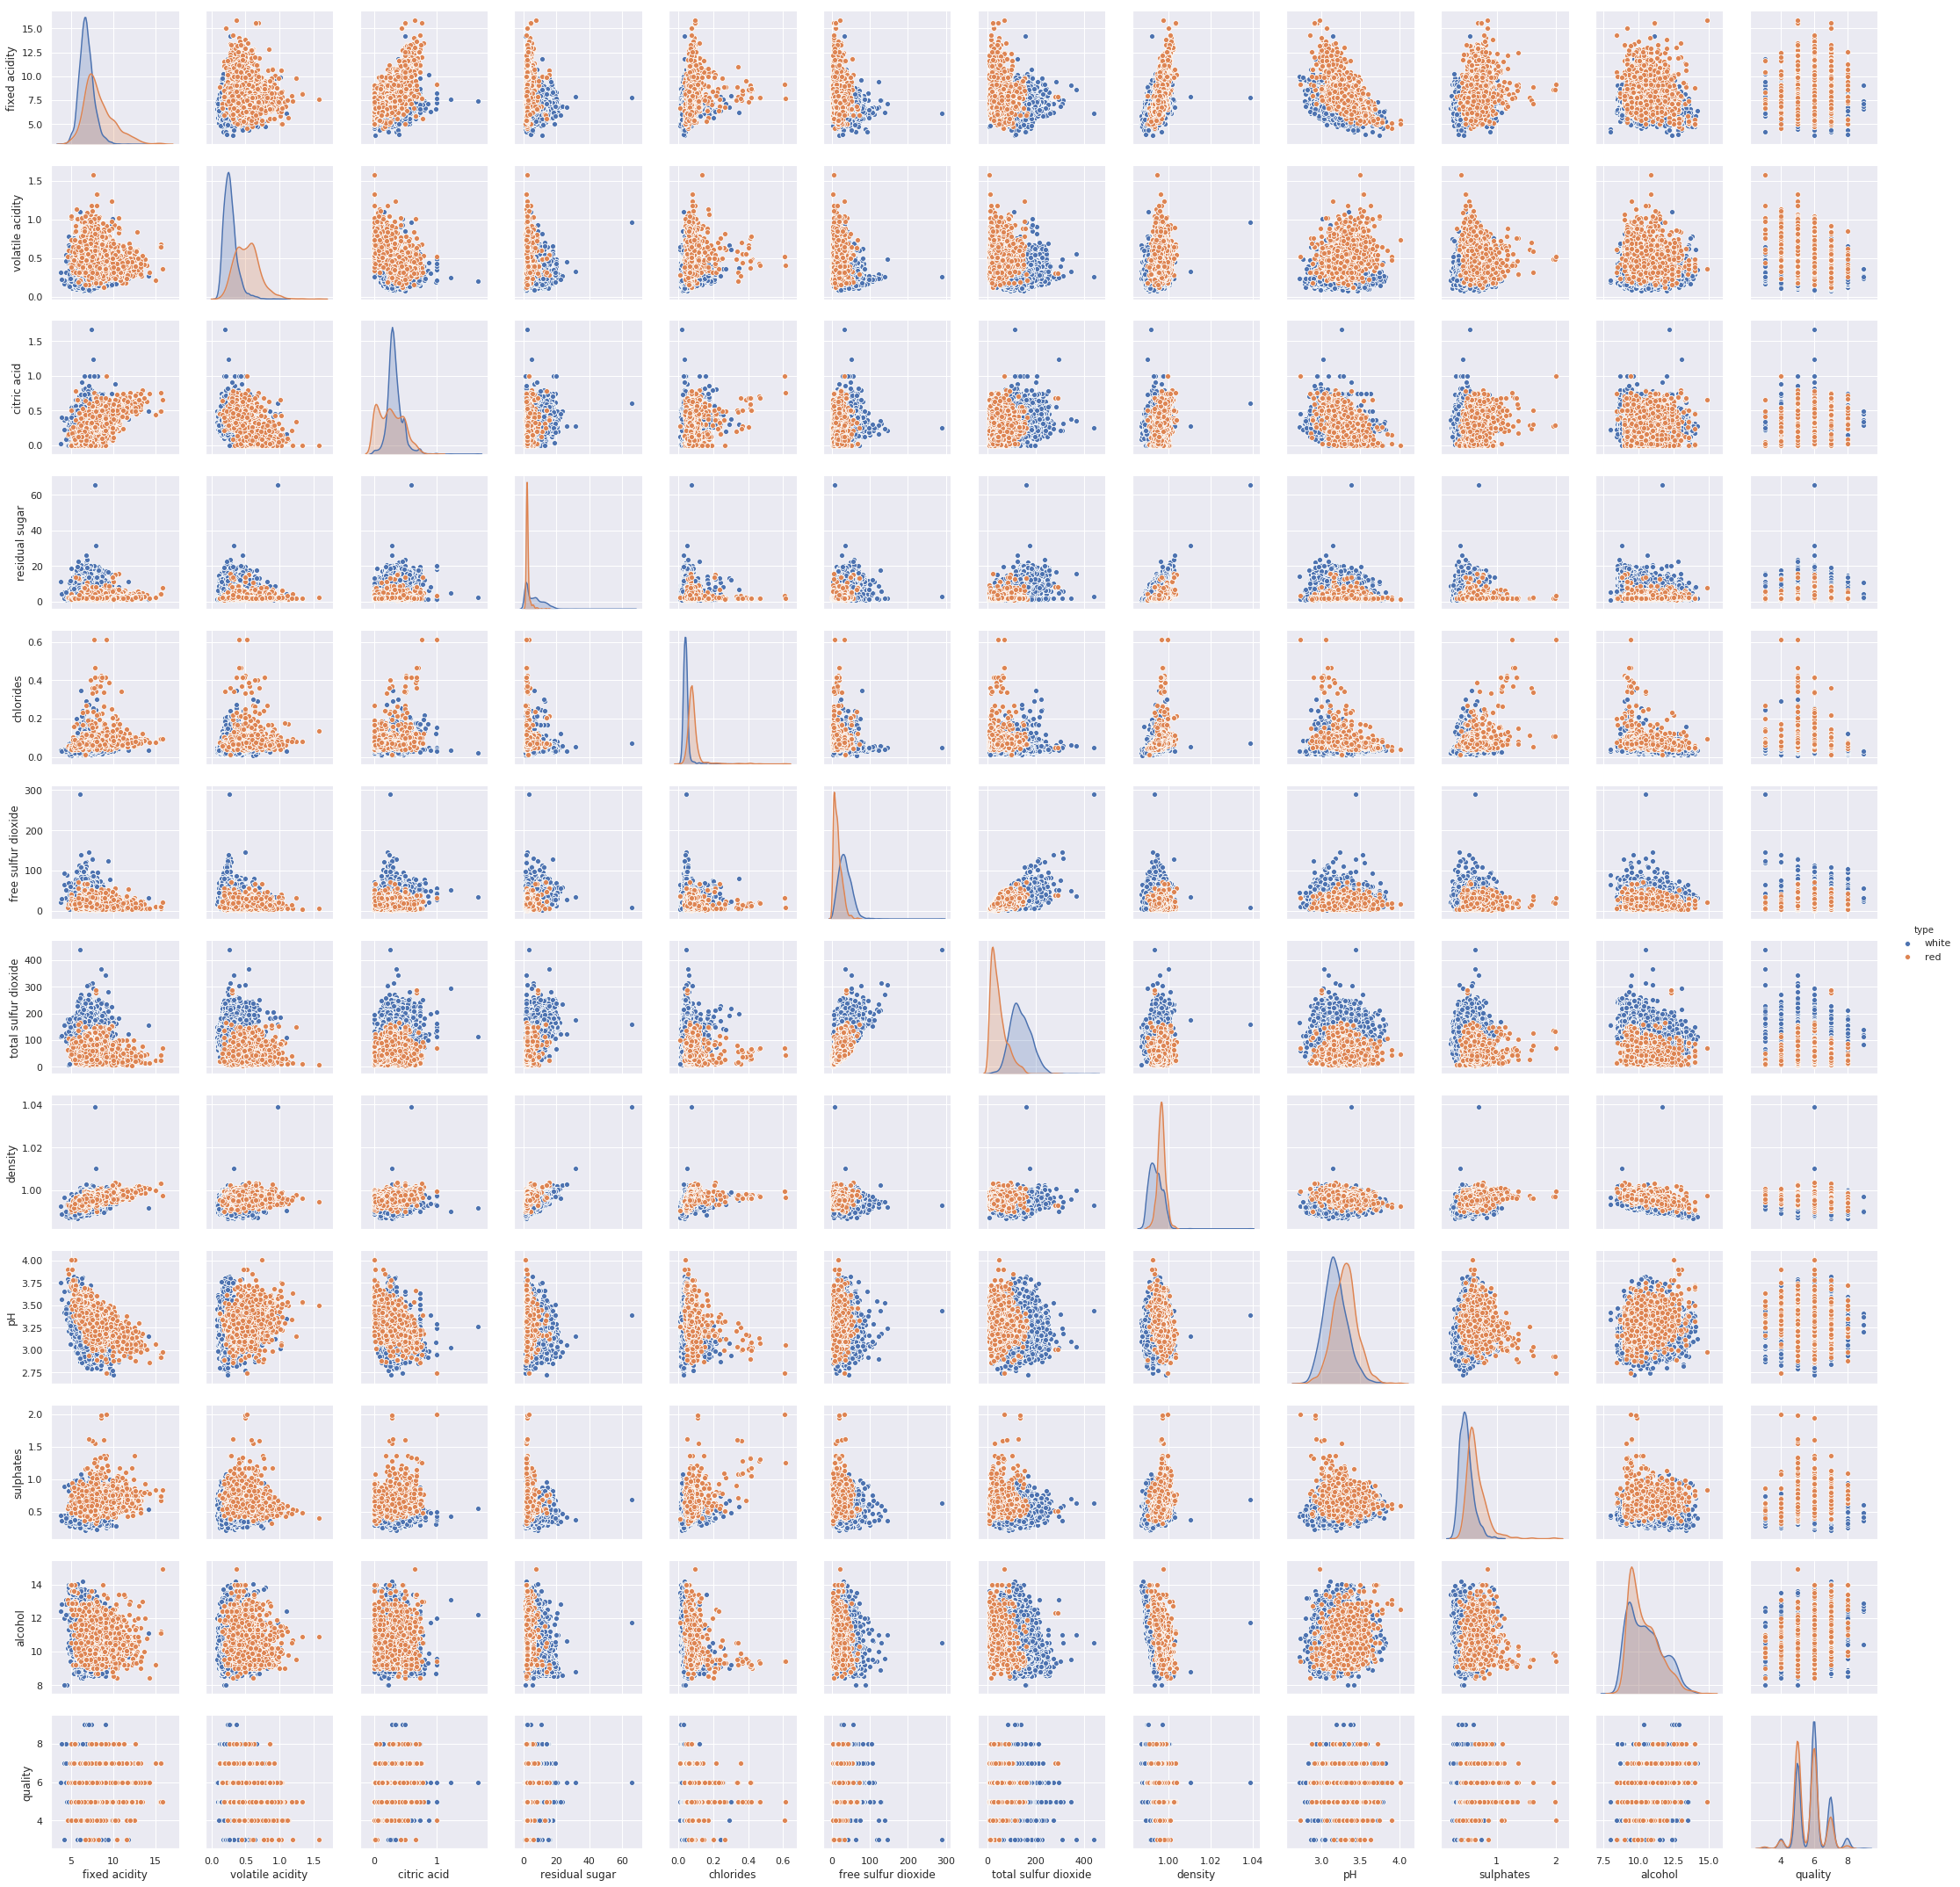

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(dfw,hue='type')



All of the features are so far from normal distribution, so the data was standardized to visualize the distributions in the dataset and to see the outliers


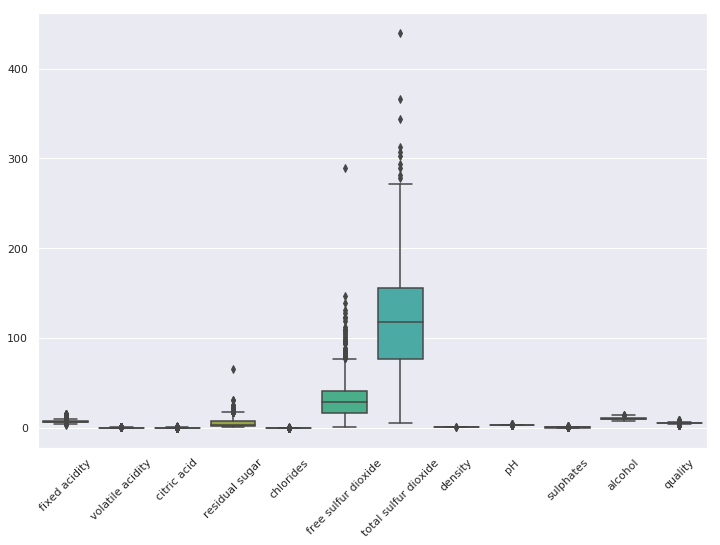

In [17]:
table = dfw.pivot_table('alcohol',index='quality',columns='type')
q = table.quantile(0.90)
df = table[table < q]
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
ax = sns.boxplot(data=dfw)


We know that older the wine, better it tastes. Sulphur dioxide acts as a preservative and antioxidant which is widely used in winemaking.Hence we can observe that Total sulphur dioxide dominates all other wine components.

Text(0, 0.5, 'Quantity')

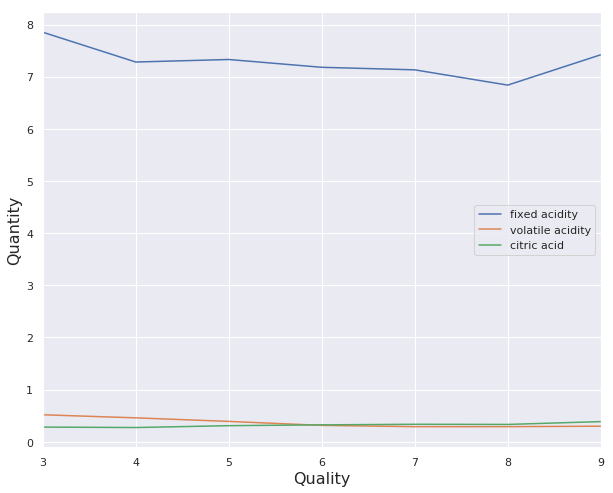

In [18]:
df = dfw.groupby(['quality'])
df_mean = df['fixed acidity','volatile acidity','citric acid'].aggregate(np.mean)
df_mean.plot(figsize=(10,8))
plt.xlabel('Quality',fontsize=16)
plt.ylabel('Quantity',fontsize=16)


**The fixed acidity content is more as compared to volatile acid and citric acid. Combination of these acids contribute to the taste of wine.


In [19]:
#removing outliers

from sklearn import preprocessing
standrd_scaler = preprocessing.StandardScaler()


In [20]:
#Normalization
np_scaled = standrd_scaler.fit_transform(white_df_x)
scaled_white_df = pd.DataFrame(np_scaled, columns = [name for name in list(white_df_x)])
scaled_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.171786,-0.080292,0.213402,2.821444,-0.035318,0.569204,0.745181,2.330370,-1.246990,-0.347685,-1.394475
1,-0.658230,0.218161,0.047979,-0.945568,0.147805,-1.253123,-0.149228,-0.008615,0.741259,0.002626,-0.825889
2,1.476097,0.019192,0.544247,0.099729,0.193585,-0.312567,-0.973026,0.358940,0.476159,-0.435263,-0.338530
3,0.408933,-0.478230,-0.117443,0.415290,0.559830,0.686773,1.121774,0.526010,0.012234,-0.785574,-0.500983
4,0.408933,-0.478230,-0.117443,0.415290,0.559830,0.686773,1.121774,0.526010,0.012234,-0.785574,-0.500983


In [21]:
scaled_white_df.max()

fixed acidity            8.709093
volatile acidity         8.176922
citric acid             10.965866
residual sugar          11.716325
chlorides               13.744637
free sulfur dioxide     14.912678
total sulfur dioxide     7.100192
density                 15.021031
pH                       4.187556
sulphates                5.169709
alcohol                  2.991760
dtype: float64

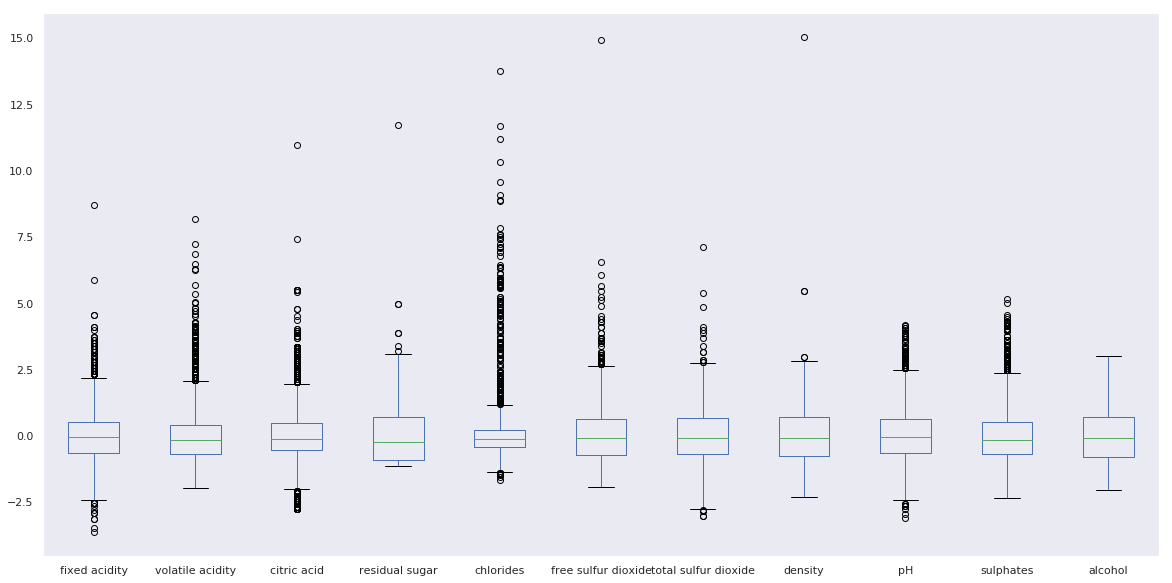

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
scaled_white_df.boxplot(column=[name for name in list(scaled_white_df)], grid=False)


In [23]:
list(scaled_white_df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [24]:
def fit_and_plot(name, dist, data):
    upper_bound = len(data)
    params = dist.fit(data) #return (mean, std) tuple
    arg = params[:-2] #The skewness reduces as the value of alpha increases. (for gamma distribution)
    #gamma is class of continue distributions
    loc = params[0]
    scale = params[1]
    x = np.linspace(min(data), max(data))
    _, ax = plt.subplots(figsize=(30, 10))
    plt.scatter(data, np.linspace(1, 10, upper_bound))
    ax2 = ax.twinx() # instantiate a second axes that shares the same x-axis
    plt.plot(x, dist.pdf(x, loc=0, scale=1), '-', color = "r")
    plt.show()
    print(name)
    print('mean = ' + str(loc), 'std = ' + str(scale))
    print('\n')
    return dist, loc, scale


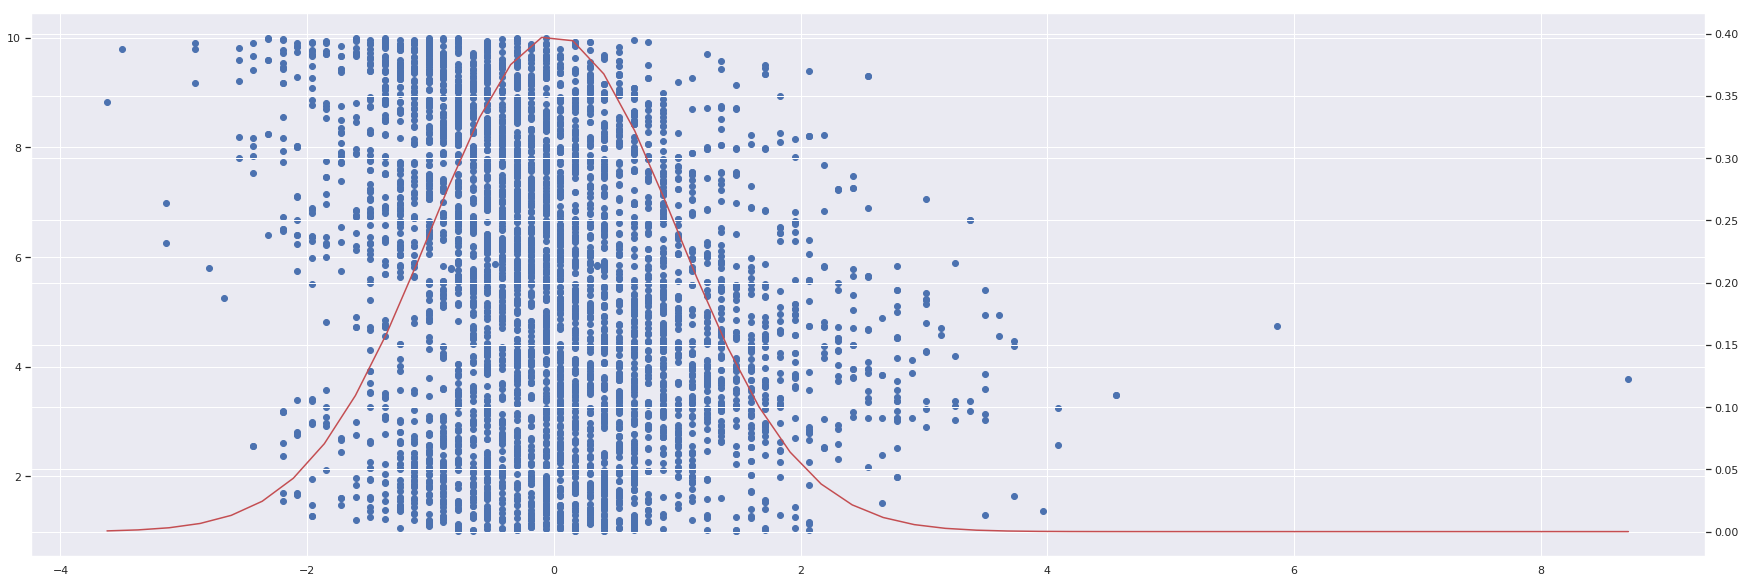

fixed acidity
mean = -1.4006591916420867e-15 std = 1.0




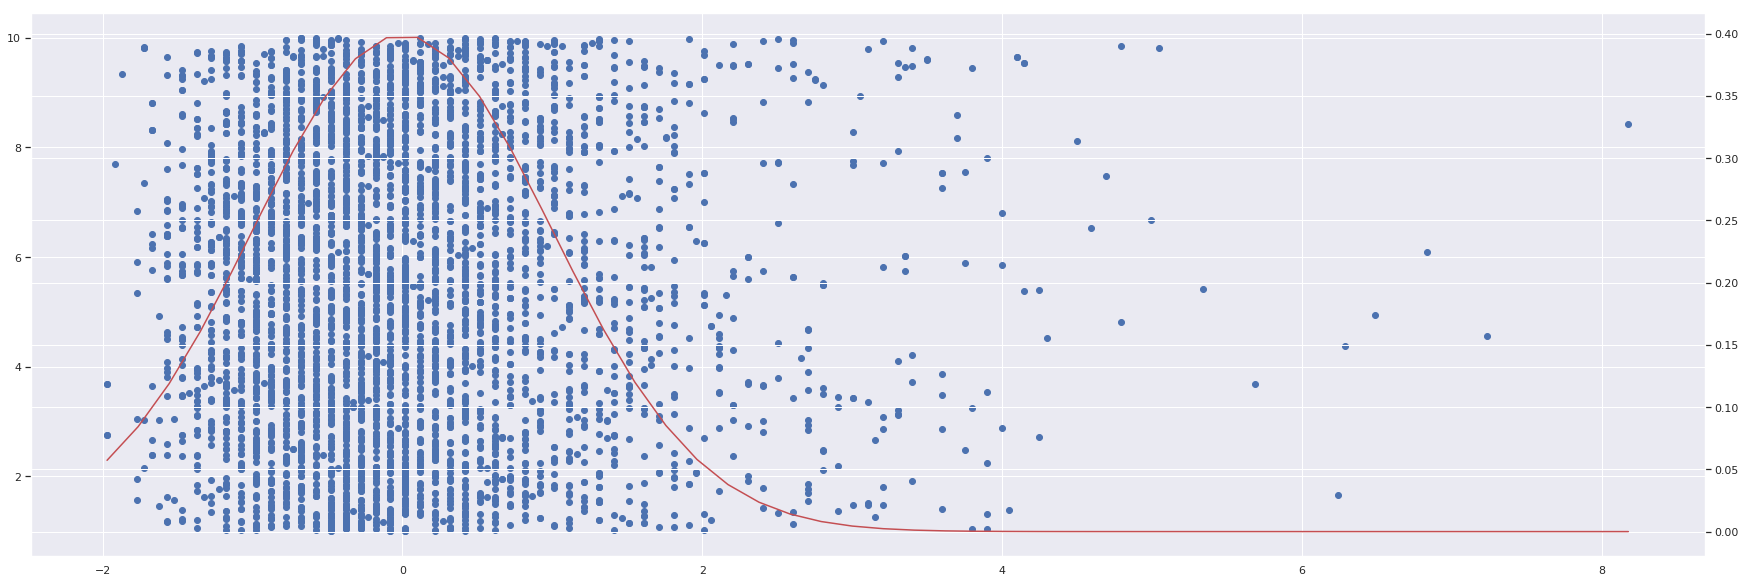

volatile acidity
mean = 3.10771258145588e-16 std = 1.0




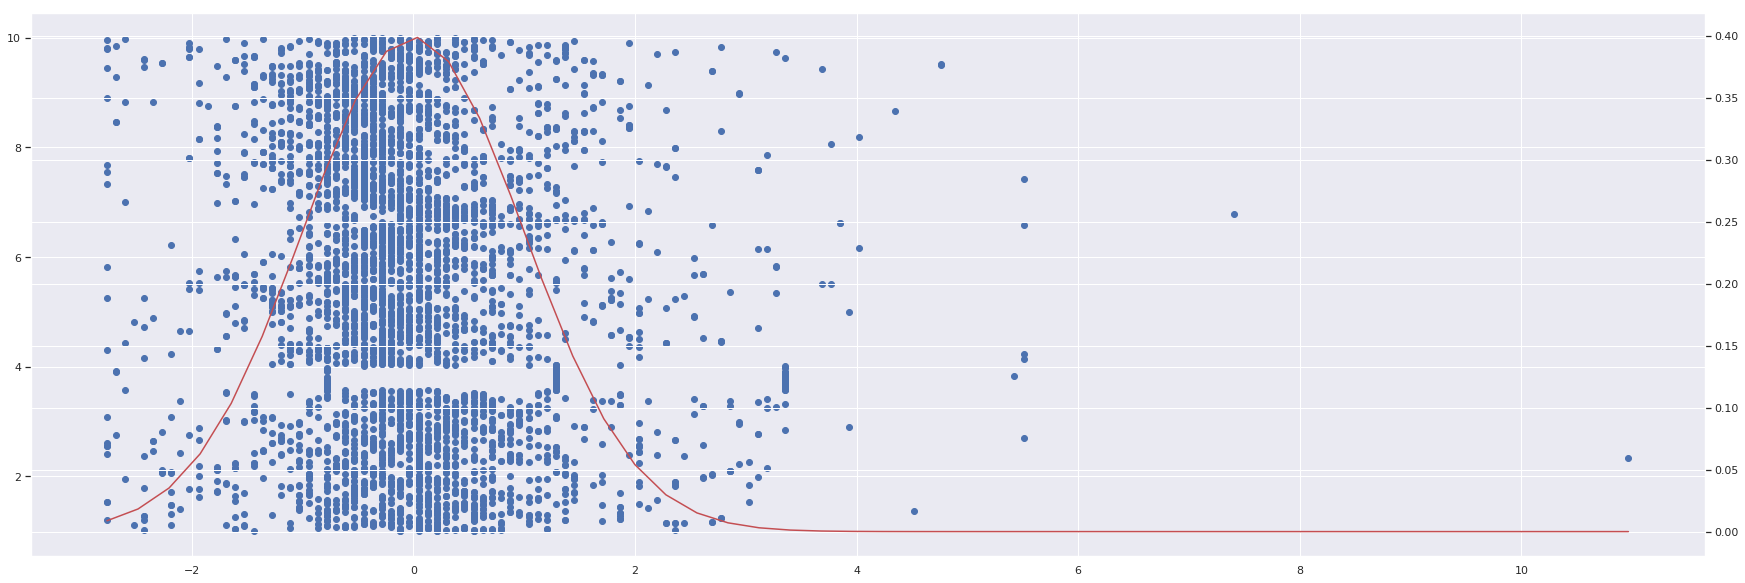

citric acid
mean = 1.8675455888561154e-16 std = 1.0




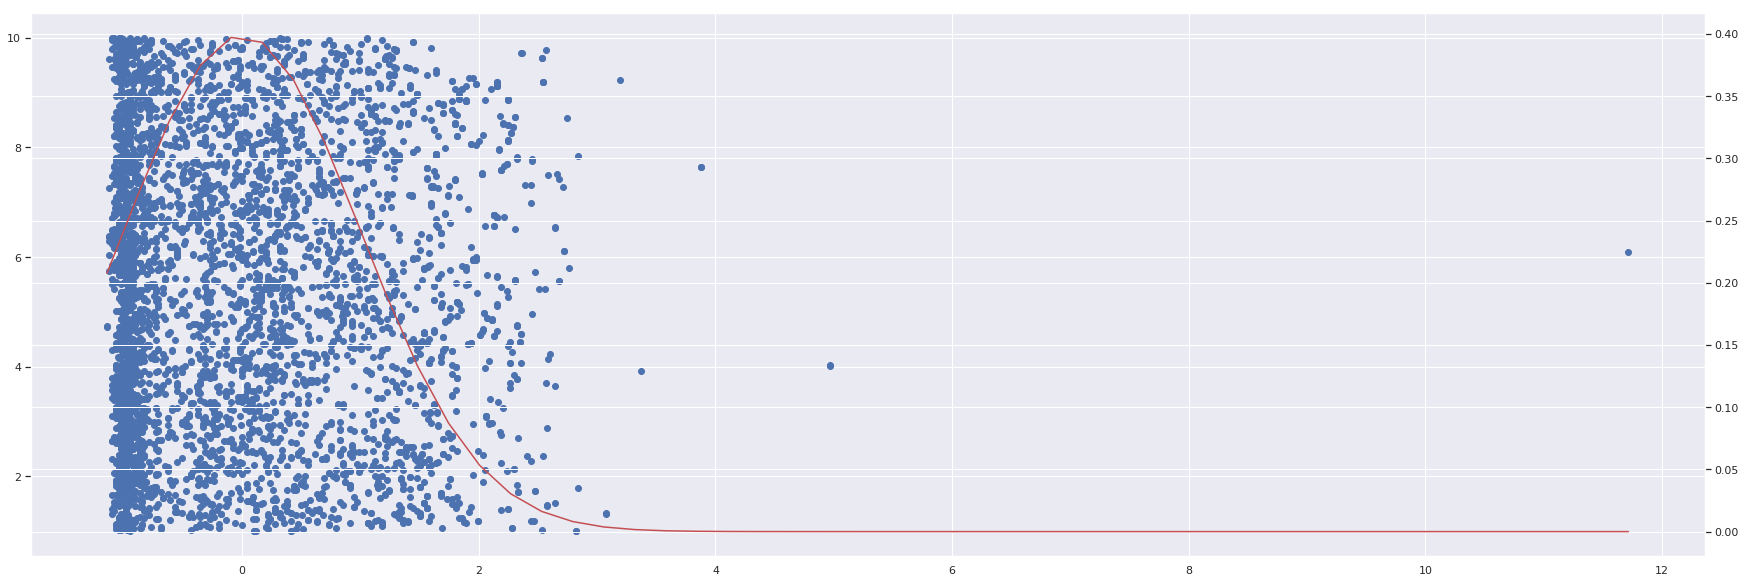

residual sugar
mean = 1.8967259886819923e-17 std = 1.0




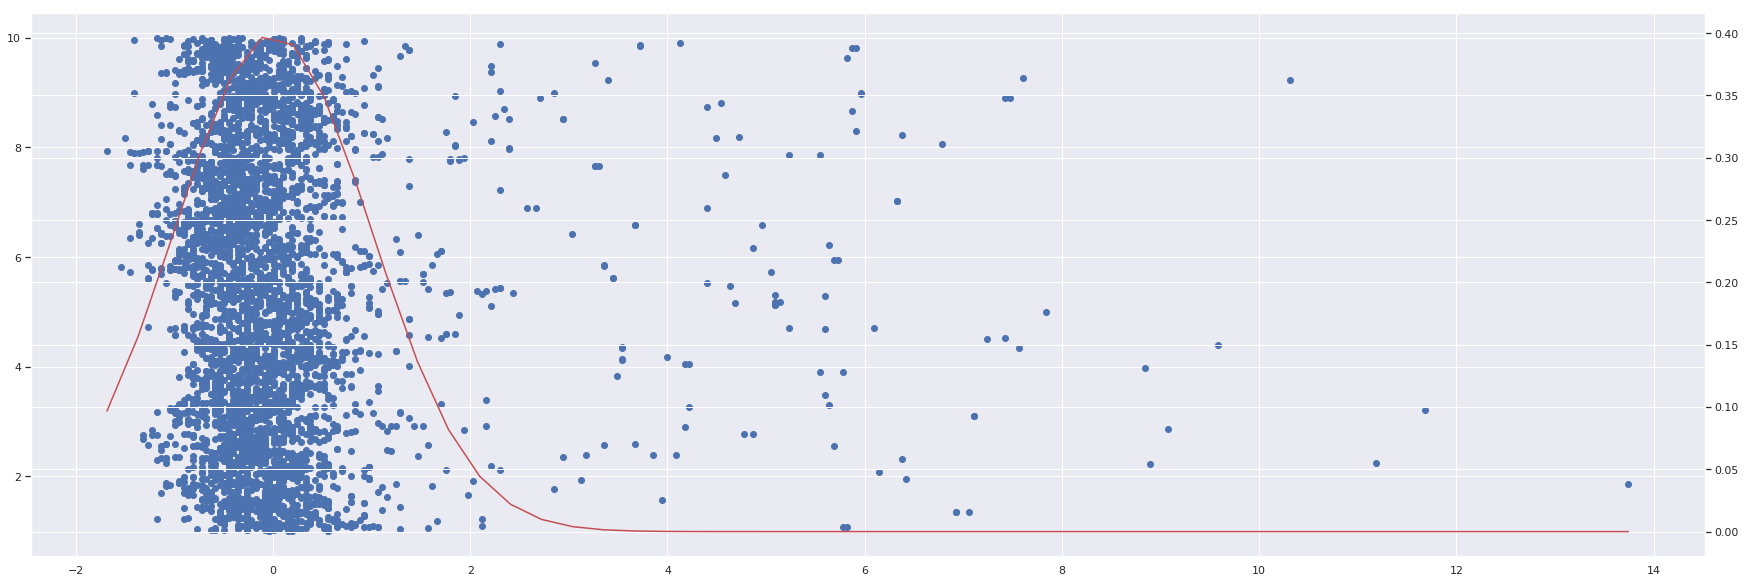

chlorides
mean = 3.443287179453463e-16 std = 1.0




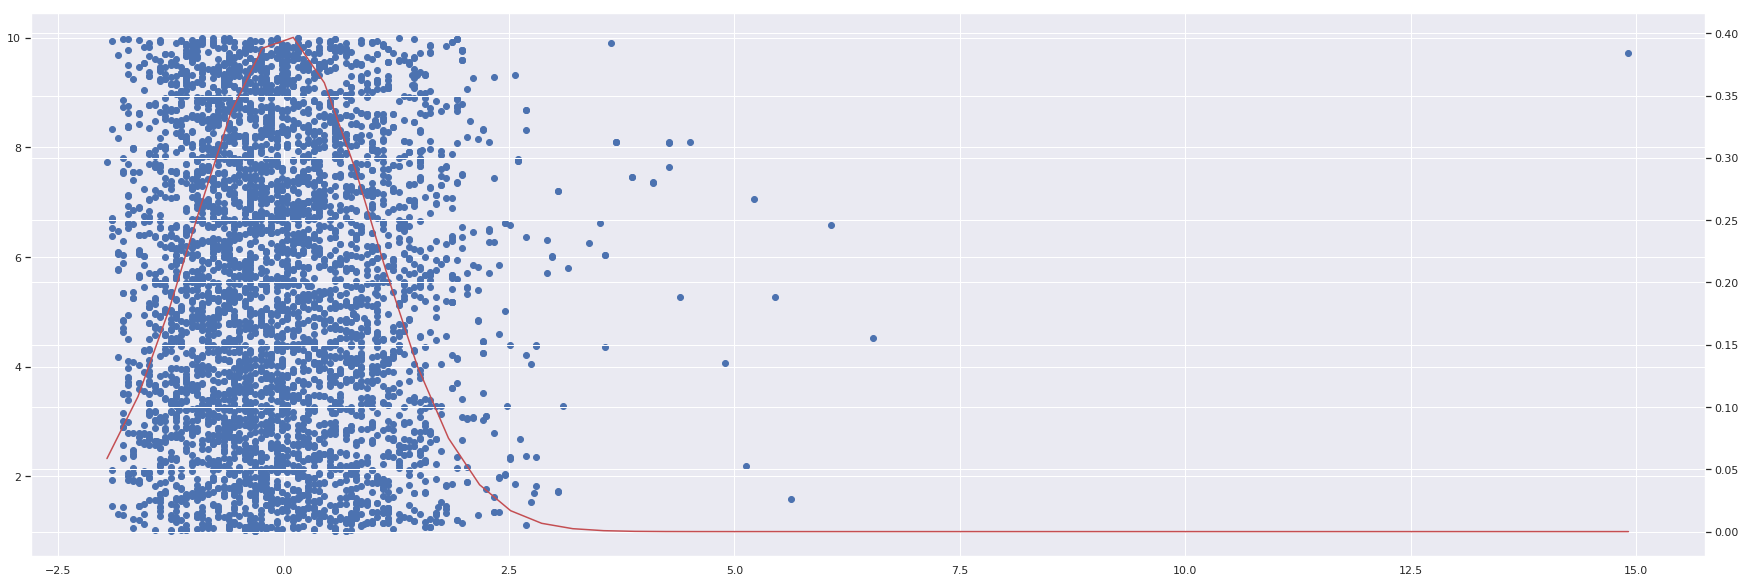

free sulfur dioxide
mean = 1.0614370436662688e-16 std = 1.0




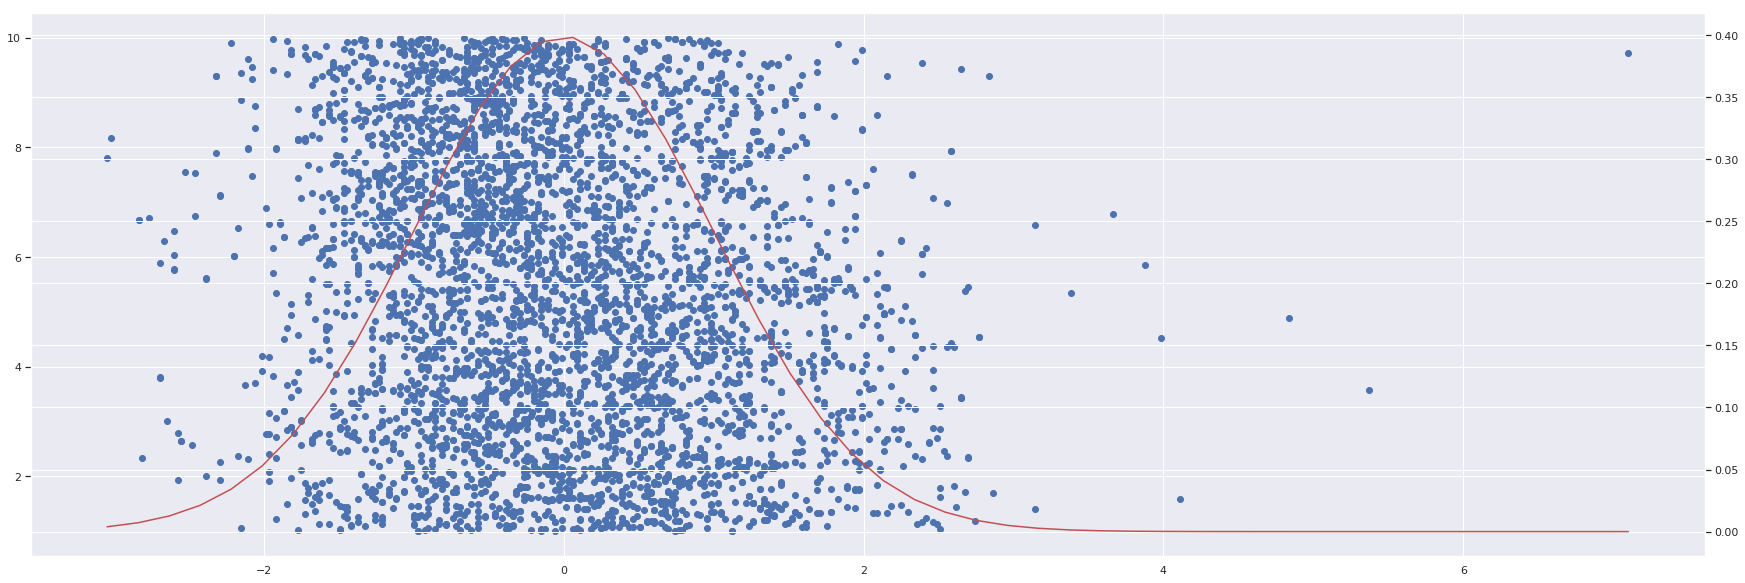

total sulfur dioxide
mean = -1.1672159930350722e-16 std = 1.0




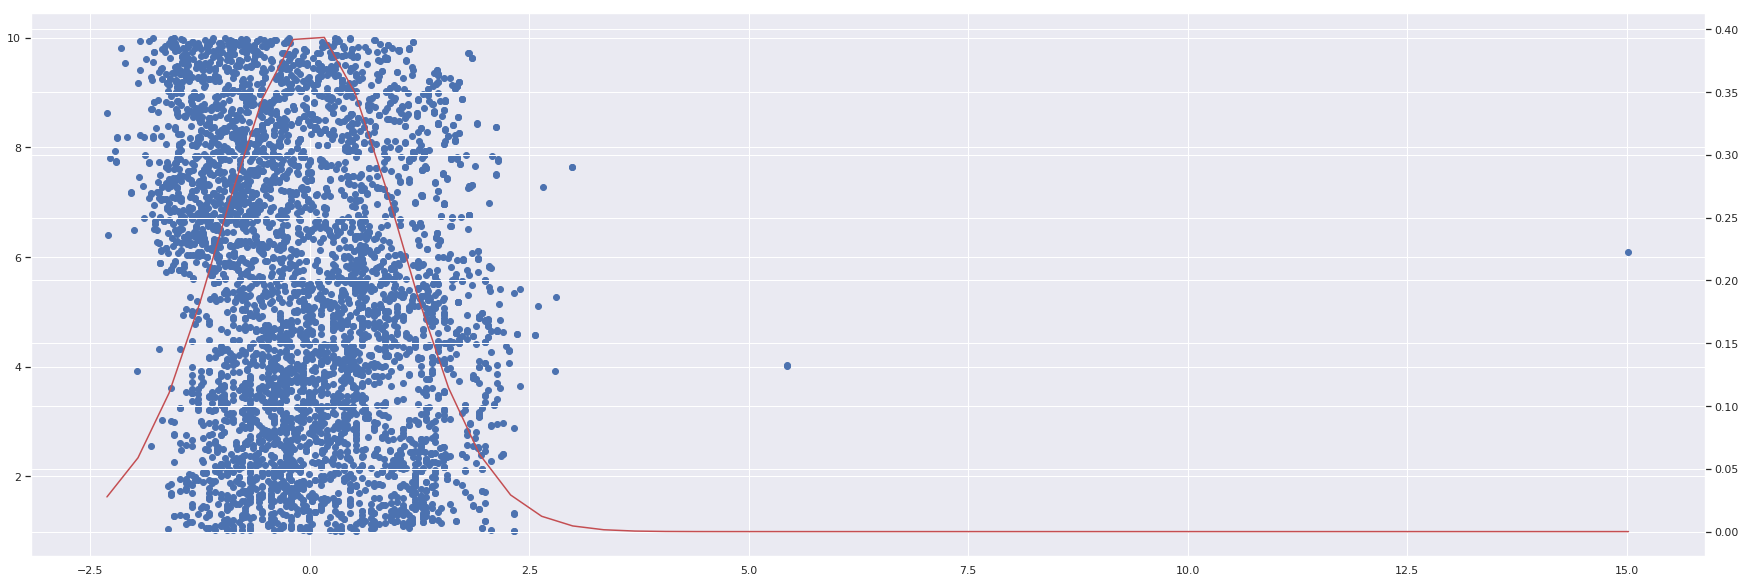

density
mean = -1.6924631899008548e-14 std = 1.0




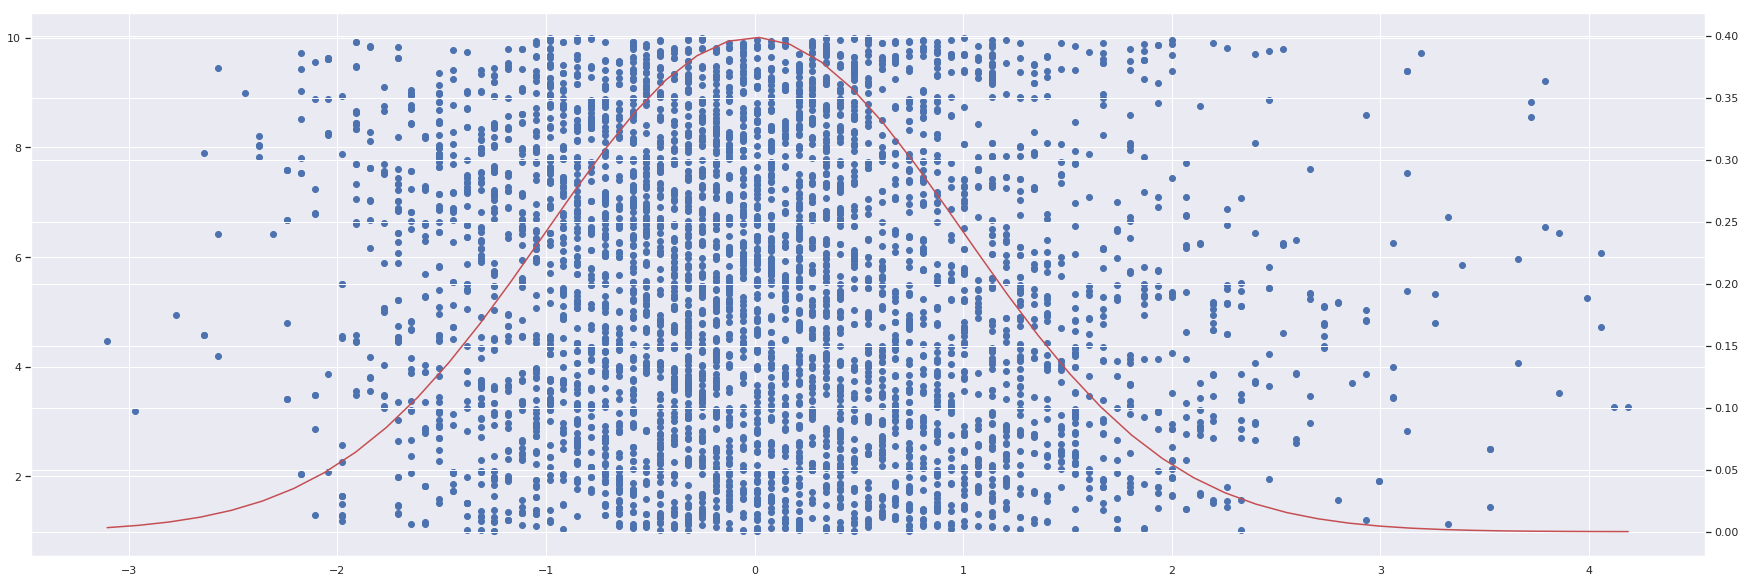

pH
mean = -2.9413843024483818e-15 std = 0.9999999999999999




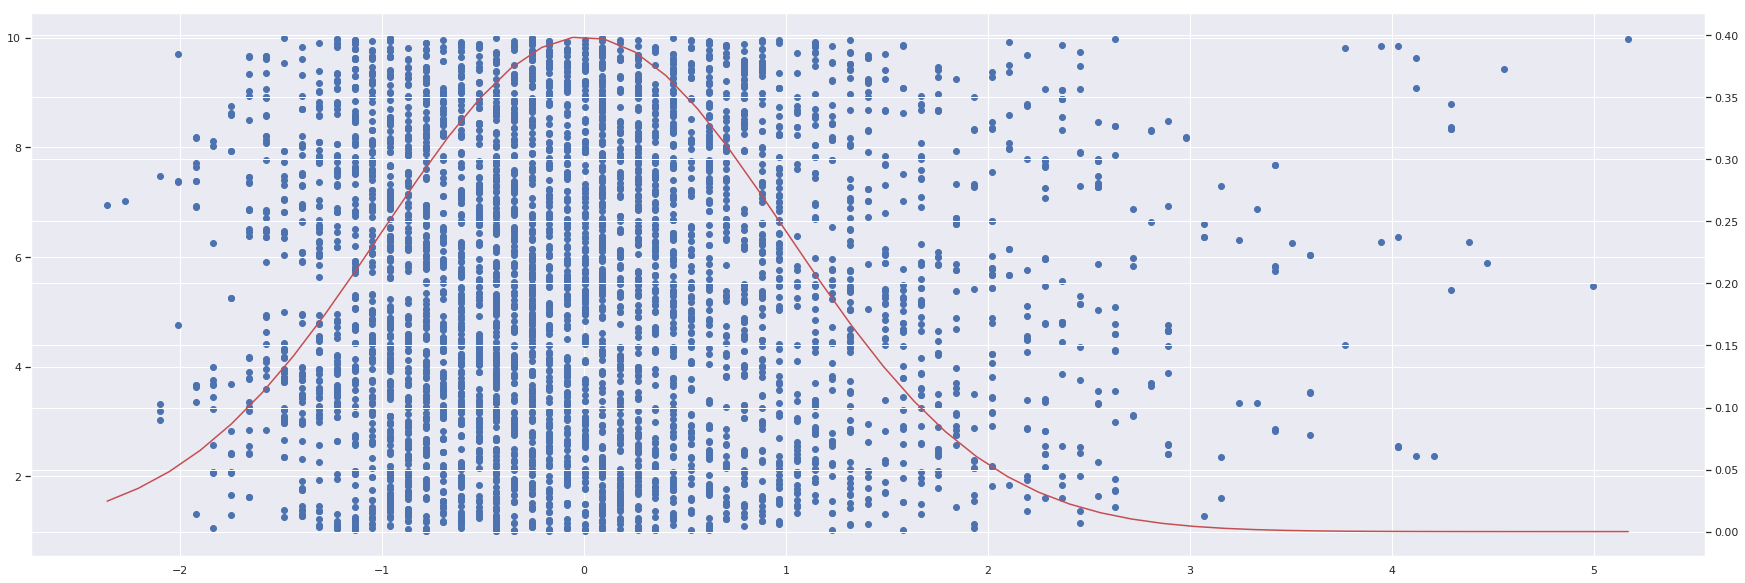

sulphates
mean = -4.800175771356735e-16 std = 1.0




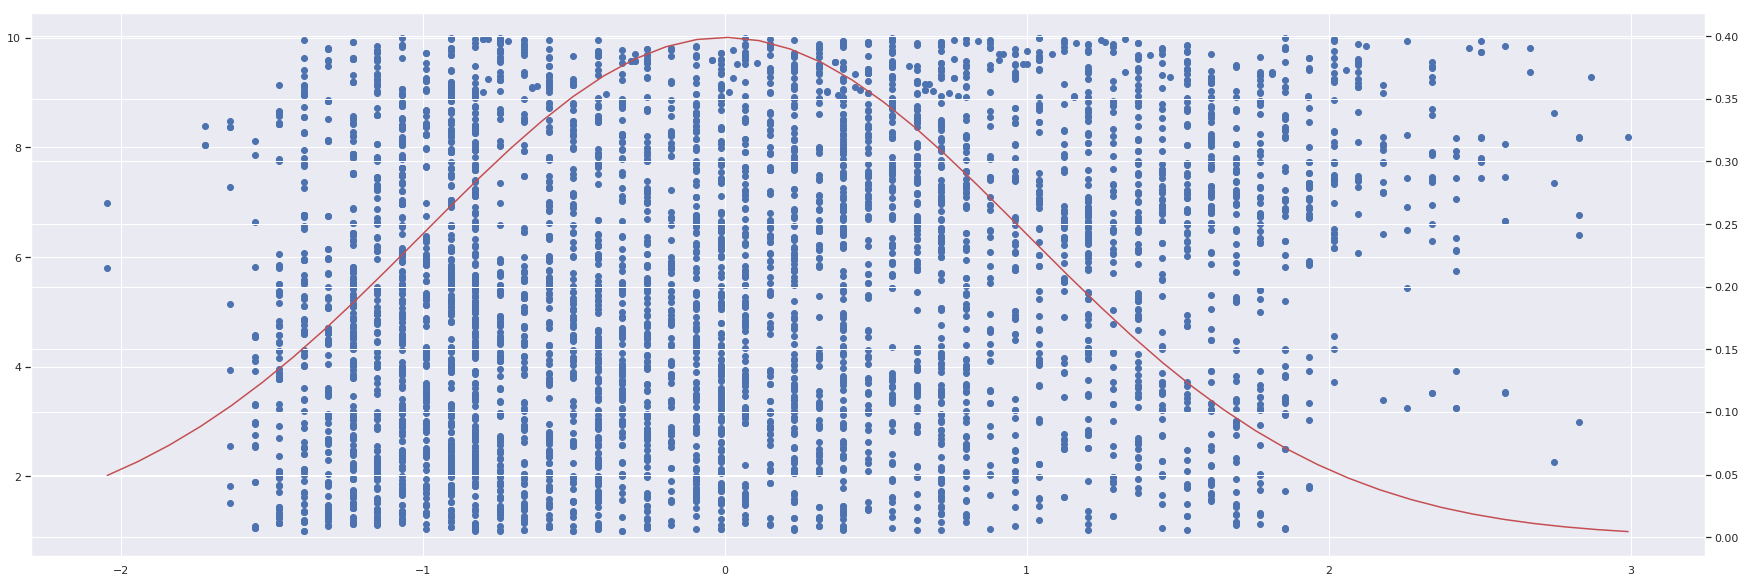

alcohol
mean = -8.170511951245505e-16 std = 1.0




In [25]:
import scipy
from scipy import stats
for name in list(scaled_white_df):
    fit_and_plot(name, stats.norm, scaled_white_df[name])

'residual sugar' is highly skewed to left
'pH' is more or less uniformly distributed

In [26]:
stats.norm.fit(scaled_white_df['fixed acidity'])

(-1.4006591916420867e-15, 1.0)

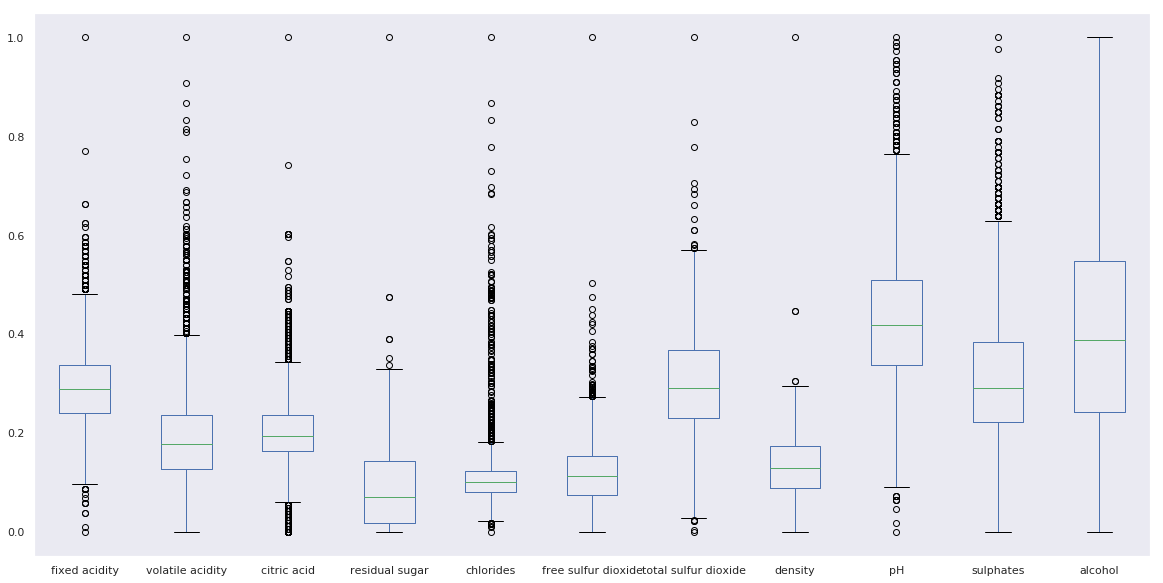

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()
np_min_max_scaled = min_max_scaler.fit_transform(white_df_x)
min_max_scaled_white_df = pd.DataFrame(np_min_max_scaled, columns = [name for name in list(white_df_x)])
fig = plt.figure(figsize = (20,10))
min_max_scaled_white_df.boxplot(column=[name for name in list(min_max_scaled_white_df)], grid=False)

In [28]:
def outliers_detection(data):
    data = np.array(data)
    percentile_25 = np.percentile(data, 25)
    percentile_50 = np.percentile(data, 50)
    percentile_75 = np.percentile(data, 75)
    lower_bound = percentile_25 - 1.5 * (percentile_75 - percentile_25)
    upper_bound = percentile_75 + 1.5 * (percentile_75 - percentile_25)
    outliers = []
    for point in list(data):
        if point < lower_bound or point > upper_bound:
            outliers.append(point)
        else:
            outliers.append('not a outlier')
    
    return outliers

In [29]:
d_outliers_focused = {}
for name in list(white_df_x):
    d_outliers_focused.setdefault(name, outliers_detection(white_df_x[name]))
white_df_outliers_focused = pd.DataFrame(data=d_outliers_focused)
white_df_outliers_focused.head()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
1,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
2,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
3,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
4,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier


In [30]:
series_list = []
for index, row in white_df_outliers_focused.iterrows():
    for name in list(white_df_outliers_focused):
        if type(row[name]) == np.float64:
            series_list.append(row)
            break
            
white_df_outliers = pd.DataFrame(series_list, columns=list(white_df_outliers_focused))
white_df_outliers.describe()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,879,879,879,879,879,879,879,879,879,879,879
unique,1,105,40,4,25,28,29,6,26,17,47
top,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
freq,879,669,613,874,761,829,804,872,755,860,697


In [31]:
outliers_indices = white_df_outliers.index.tolist()
print(outliers_indices)

[14, 16, 19, 22, 33, 38, 39, 57, 59, 62, 64, 69, 76, 77, 81, 82, 84, 85, 86, 92, 94, 105, 110, 115, 119, 132, 135, 141, 148, 152, 153, 163, 171, 181, 187, 188, 189, 195, 200, 201, 202, 214, 219, 222, 229, 230, 237, 241, 242, 258, 260, 262, 270, 283, 285, 286, 289, 291, 300, 304, 309, 314, 328, 346, 347, 355, 360, 375, 380, 383, 390, 393, 395, 399, 403, 421, 426, 429, 436, 445, 450, 451, 454, 456, 464, 470, 482, 485, 487, 492, 493, 494, 495, 509, 512, 514, 515, 525, 533, 535, 539, 540, 547, 548, 554, 564, 576, 577, 583, 585, 586, 595, 596, 597, 598, 603, 606, 608, 628, 638, 641, 644, 663, 665, 669, 676, 681, 682, 710, 721, 726, 732, 734, 737, 738, 739, 743, 746, 751, 752, 754, 755, 758, 760, 762, 772, 777, 780, 785, 791, 793, 796, 798, 800, 809, 813, 826, 831, 832, 833, 834, 838, 841, 843, 845, 847, 849, 850, 852, 856, 857, 858, 869, 871, 891, 893, 899, 900, 904, 906, 907, 915, 924, 926, 947, 948, 951, 956, 957, 976, 984, 991, 993, 1001, 1004, 1006, 1011, 1013, 1017, 1019, 1028, 1030, 1

In [32]:
white_df_x.drop(white_df_x.index[outliers_indices], inplace=True)
white_df_x.describe()

/home/mitushi/.local/lib/python3.5/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000
mean,6.813142,0.264248,0.324315,6.379516,0.042350,34.757705,136.982962,0.993861,3.187261,0.480877,10.583896
std,0.736358,0.076225,0.086085,4.925179,0.009892,14.994148,41.091849,0.002887,0.137952,0.098945,1.213760
min,4.800000,0.080000,0.100000,0.600000,0.016000,2.000000,21.000000,0.987110,2.830000,0.220000,8.400000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991590,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993550,3.180000,0.470000,10.500000
75%,7.300000,0.310000,0.370000,9.700000,0.049000,45.000000,166.000000,0.995900,3.280000,0.540000,11.400000
max,8.800000,0.485000,0.570000,22.000000,0.071000,80.000000,255.000000,1.001960,3.560000,0.760000,14.200000


This is much more close to normal distribution :

In [33]:
np_scaled = standrd_scaler.fit_transform(white_df_x)
scaled_white_df = pd.DataFrame(np_scaled, columns = [name for name in list(white_df_x)])

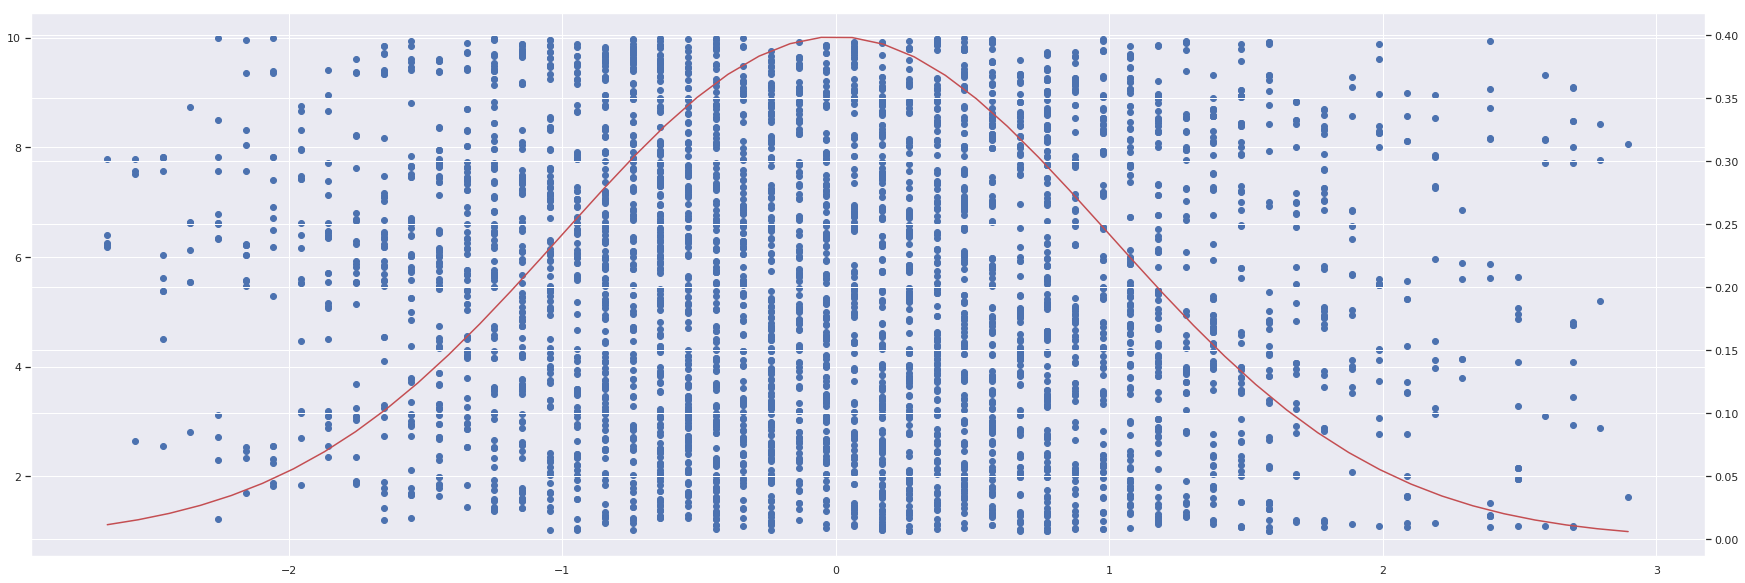

chlorides
mean = 1.5667191367298626e-16 std = 0.9999999999999999




(<scipy.stats._continuous_distns.norm_gen at 0x7f955baf0e80>,
 1.5667191367298626e-16,
 0.9999999999999999)

In [34]:
fit_and_plot('chlorides', stats.norm, scaled_white_df['chlorides'])

Observe the difference

In [35]:
#final_data_white = scaled_white_df

#Can also be done for red - I have done it separately to mark both of them as instances of diff distribution.

In [36]:
white_df['quality'].drop(white_df['quality'].index[outliers_indices], inplace=True)


In [37]:
np_scaled = standrd_scaler.fit_transform(white_df)
scaled_white_df1 = pd.DataFrame(np_scaled, columns = [name for name in list(white_df)])

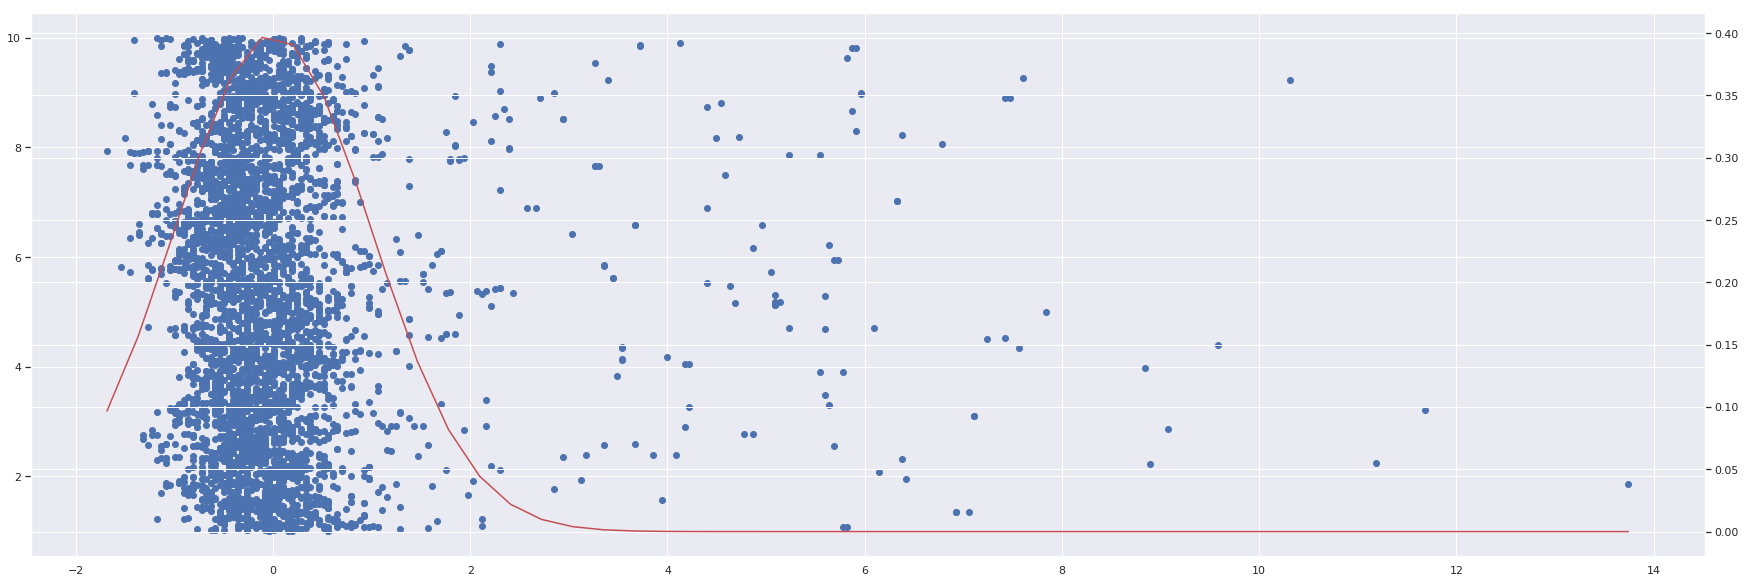

chlorides
mean = 3.443287179453463e-16 std = 1.0




(<scipy.stats._continuous_distns.norm_gen at 0x7f955baf0e80>,
 3.443287179453463e-16,
 1.0)

In [38]:
fit_and_plot('chlorides', stats.norm, scaled_white_df1['chlorides'])

In [39]:
scaled_white_df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.171786,-0.080292,0.213402,2.821444,-0.035318,0.569204,0.745181,2.330370,-1.246990,-0.347685,-1.394475,0.137726
1,-0.658230,0.218161,0.047979,-0.945568,0.147805,-1.253123,-0.149228,-0.008615,0.741259,0.002626,-0.825889,0.137726
2,1.476097,0.019192,0.544247,0.099729,0.193585,-0.312567,-0.973026,0.358940,0.476159,-0.435263,-0.338530,0.137726
3,0.408933,-0.478230,-0.117443,0.415290,0.559830,0.686773,1.121774,0.526010,0.012234,-0.785574,-0.500983,0.137726
4,0.408933,-0.478230,-0.117443,0.415290,0.559830,0.686773,1.121774,0.526010,0.012234,-0.785574,-0.500983,0.137726
5,1.476097,0.019192,0.544247,0.099729,0.193585,-0.312567,-0.973026,0.358940,0.476159,-0.435263,-0.338530,0.137726
6,-0.776804,0.417130,-1.440823,0.119451,-0.035318,-0.312567,-0.055080,0.292112,-0.054041,-0.172530,-0.744663,0.137726
7,0.171786,-0.080292,0.213402,2.821444,-0.035318,0.569204,0.745181,2.330370,-1.246990,-0.347685,-1.394475,0.137726
8,-0.658230,0.218161,0.047979,-0.945568,0.147805,-1.253123,-0.149228,-0.008615,0.741259,0.002626,-0.825889,0.137726
9,1.476097,-0.577715,0.792381,-0.965290,-0.081098,-0.430136,-0.219840,-0.075443,0.211059,-0.347685,0.392510,0.137726


## Stacking using 3 models

In [45]:
import sys
!{sys.executable} -m pip install vecstack

  Using cached https://files.pythonhosted.org/packages/9b/21/2b18339d24a2f73dcefb2f10f48aff6182e16da83e3a612684443c6cfb29/numpy-1.17.2-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7a/0e/3781e028d62a8422244582abd8f084e6314297026760587c85607f687bf3/scipy-1.3.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1f/af/e3c3cd6f61093830059138624dbd26d938d6da1caeec5aeabe772b916069/scikit_learn-0.21.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8f/42/155696f85f344c066e17af287359c9786b436b1bf86029bb3411283274f3/joblib-0.14.0-py2.py3-none-any.whl
  Running setup.py bdist_wheel for vecstack ... done
  Running setup.py clean for vecstack
Failed to build vecstack
  Running setup.py install for vecstack ... done
You are using pip version 8.1.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import vecstack

In [2]:
from sklearn.metrics import f1_score
#f1_score(y_true, y_pred, average=None)
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [24]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler

In [32]:
le = LabelEncoder()
col_type = le.fit_transform(dfw['type'])

In [33]:
dfw['type'] = col_type

In [34]:
target = 'type'
predictors = [i for i in dfw.columns if i not in [target]]

In [39]:
dfw2 = pd.DataFrame(dfw.values ,  columns = dfw.columns)
se = StandardScaler()
df = se.fit_transform(dfw[predictors]) #so that we can use knn

In [40]:
dfw.loc[:,predictors] = df

In [42]:
dfw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922,0.207846
1,1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184,0.207846
2,1,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265,0.207846
3,1,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.207846
4,1,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905,0.207846


In [43]:
dfw2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [45]:
#Ready to stack

X_train, X_test, y_train, y_test = train_test_split(dfw[predictors], dfw[target], test_size=0.2, random_state=0)

In [46]:
#checking without tuning for now

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [48]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=f1_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.99438489]
    fold  1:  [0.99795292]
    fold  2:  [0.99488753]
    fold  3:  [0.99795501]
    ----
    MEAN:     [0.99629509] + [0.00166837]
    FULL:     [0.99629393]

model  1:     [RandomForestClassifier]
    fold  0:  [0.98732894]
    fold  1:  [0.99490835]
    fold  2:  [0.98983740]
    fold  3:  [0.98929118]
    ----
    MEAN:     [0.99034147] + [0.00279683]
    FULL:     [0.99033816]

model  2:     [XGBClassifier]
    fold  0:  [0.99287894]
    fold  1:  [0.99948901]
    fold  2:  [0.99744768]
    fold  3:  [0.99693252]
    ----
    MEAN:     [0.99668704] + [0.00239747]
    FULL:     [0.99668283]



In [50]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % f1_score(y_test, y_pred,average='weighted'))

Final prediction score: [0.99301537]


WOAH. Hands down stacking.